# Jacobi Example

In [1]:
# dependencies
using LFAToolkit
using LinearAlgebra
using Pkg
Pkg.activate("./")
Pkg.instantiate()
using Plots

 Activating environment at `~/Dev/LFAToolkit.jl/examples/jupyter/Project.toml`


In [37]:
# setup
p = 17
dimension = 1

mesh = []
if dimension == 1
   mesh = Mesh1D(1.0)
elseif dimension == 2
   mesh = Mesh2D(1.0, 1.0)
end

basis = TensorH1LagrangeBasis(p, p, dimension)

# operator
diffusion = GalleryOperator("diffusion", p, p, mesh)

# Jacobi smoother
jacobi = Jacobi(diffusion)

jacobi preconditioner

max eigenvalue: 2.669670993440514
min eigenvalue: 1.390800821114855e-7
max high eigenvalue: 2.6592018433400866
min high eigenvalue: 0.002020470407905137


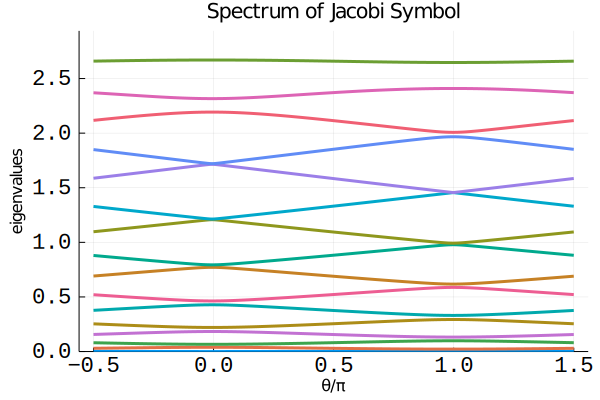

In [38]:
# full operator symbols
numberruns = 250
maxeigenvalue = 0
mineigenvalue = 1
maxeigenvalue_high = 0
mineigenvalue_high = 1
θ_min = -π/2
θ_max = 3π/2

# compute and plot smoothing factor
# -- 1D --
if dimension == 1
    # setup
    ω = [1.0]
    maxeigenvalues = zeros(p - 1, numberruns)

    # compute
    for i in 1:numberruns
        θ = [θ_min + (θ_max - θ_min)*i/numberruns]
        if abs(θ[1] % 2π) >  π/512
            A = I - computesymbols(jacobi, ω, θ)
            eigenvalues = eigvals(A)
            maxeigenvalues[1:p-1, i] = [real(val) for val in eigenvalues]
            maxeigenvalue = max(maxeigenvalue, max([real(val) for val in eigvals(A)]...))
            mineigenvalue = min(mineigenvalue, min([real(val) for val in eigvals(A)]...))
            if θ[1] > π/2
                maxeigenvalue_high = max(maxeigenvalue_high, max([real(val) for val in eigvals(A)]...))
                mineigenvalue_high = min(mineigenvalue_high, min([real(val) for val in eigvals(A)]...))
            end
        end
    end

    # plot
    println("max eigenvalue: ", maxeigenvalue)
    println("min eigenvalue: ", mineigenvalue)
    println("max high eigenvalue: ", maxeigenvalue_high)
    println("min high eigenvalue: ", mineigenvalue_high)
    xrange = θ_min/π:(θ_max - θ_min)/π/(numberruns-1):θ_max/π
    plot(xrange,
        maxeigenvalues[1,:],
        xlabel="θ/π",
        xtickfont=font(12, "Courier"),
        ylabel="eigenvalues",
        ytickfont=font(12, "Courier"),
        linewidth=3,
        legend=:none,
        title="Spectrum of Jacobi Symbol"
    )
    for i in 2:p-1
        plot!(xrange,
            maxeigenvalues[i,:],
            linewidth=3,
        )
    end
    ylims!(0.0, max(maxeigenvalues...)*1.1)
    #savefig("jacobi_spectrum_5")
# -- 2D --
elseif dimension == 2
    # setup
    ω = [1.0]
    maxeigenvalues = zeros(numberruns, numberruns)

    # compute
    for i in 1:numberruns, j in 1:numberruns
        θ = [
            θ_min + (θ_max - θ_min)*i/numberruns,
            θ_min + (θ_max - θ_min)*j/numberruns
        ]
        if sqrt(abs(θ[1] % 2π)^2 + abs(θ[2] % 2π)^2) > π/32
            A = computesymbols(jacobi, ω, θ)
            eigenvalues = [abs(val) for val in eigvals(A)]
            maxeigenvalues[i, j] = max(eigenvalues...)
            maxeigenvalue = max(maxeigenvalue, maxeigenvalues[i, j])
        end
    end

    # plot
    println("max eigenvalue: ", maxeigenvalue)
    heatmap(maxeigenvalues, title="Jacobi Symbols", transpose=true, aspect_ratio=:equal)
    xlims!(1, numberruns)
    ylims!(1, numberruns)
end